####  <span style='color:Blue'> Dane do analizy </span>:  MNIST.csv (Modified National Institute of Standards and Technology database)
####  <span style='color:Blue'> Cel badania </span>:  Rozpoznanie i klasyfikacji znaków ręcznie napisanych . 

####   <span style='color:Blue'> Klasyfikator </span>:  Decision tree, RF, ExtraTree, XGBoost (Improved GradientBoosting)

##### <span style='color:Blue'>  Zadanie 1 </span>: Ładowanie zbioru treningowego i testowego i dodawanie nazw dla kolumn
* Dodać nazwy kolumn: <span style='color:red'>  class, pixel1, pixel2,...pixel 784 </span>
* Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
* Wyznaczyć rozkład kategorii (w procentach).
* Narysować wykres słupkowy rozkładu kategorii. 
##### <span style='color:Blue'>  Zadanie 2 </span>:   Wizualizacja 8 pierwszych liter w zbiorze uczącym i 8 pierwszych w zbiorze testowym.
__Wskazówka__: Przekształcić wektor 784-bitowy (wiersz) na macierz o wymiarach <span style='color:red'> $ 28 \times 28$ (reshape()) </span>. 
##### <span style='color:Blue'>  Zadanie 3 </span>:  Tworzenie klasyfikatora <i>Decision tree</i>.
__Wskazówka__: <span style='color:red'>  from sklearn.tree import DecisionTreeClassifier </span>

##### <span style='color:Blue'>  Zadanie 4 </span>:  Optymalizacja hyperparametrów DT.
__Wskazówka: Zmienić parametry__
* Głębokość drzewa (max_depth)
* Kryterium podziału (criterion = 'gini', 'entropy')
* Miara oceny: accuracy
<b>Wniosek</b>: Które parametry są optymalne?
##### <span style='color:Blue'>  Zadanie 5 </span> : Użyć <i>GridSearchCV</i> do wyszukiwania optymalnych hyperparametrów DT.

* Głębokość drzewa (max_depth = 10, 20, 30)
* Kryterium podziału (criterion = 'gini', 'entropy', 'log_loss')
* Miara oceny: accuracy.
<b>Wniosek</b>: Które parametry są optymane?

##### <span style='color:Blue'>  Zadanie 6 </span> : Trenować zespół klasyfikatorów <i> RandomForest </i>  z optymalizacją parametrów.
__Wskazówka__: <span style='color:red'>  from sklearn.ensemble import RandomForestClassifier </span>

##### <span style='color:Blue'>  Zadanie 7 </span> : Trenować zespół klasyfikatorów <i> ExtraTree </i>  z optymalizacją parametrów.
__Wskazówka__: <span style='color:red'>  from sklearn.ensemble import ExtraTreeClassifier </span>

##### <span style='color:Blue'>  Zadanie 8 </span>:  Trenować zespół klasyfikatorów <i> XGBoost </i>  z optymalizacją parametrów.
__Wskazówka__: 
<span style='color:red'>  !pip install  xgboost </span> 

<span style='color:red'>  import xgboost as xgb  </span>

#####  <span style='color:Blue'>  Zadanie 9 </span>: Wyznaczyć czas działania  DT, RF, ExtraTree, XGBoost
__Wskazówka__:  

#####  <span style='color:Blue'>  Zadanie 10 </span>: Napisać podsumowanie:
1. Który klasyfikator jest najlepszy?
2. Jakie są hiperparametry?
3. Porównywać czas obliczenia algorytmów RF, ExtraTree i XGBoost. Który algorytm jest najszybszy? 

In [1]:
#Importowanie danych z lokalnego dysku  

import pandas as pd 
path = 'Datasets/'
column_names = [0 for i in range (785)]
column_names[0] ='class'

for i in range (1,785):
    column_names[i] ="pixel"+ str(i)
df_train = pd.read_csv(path + 'mnist_train.csv', header = None, names = column_names)
df_test = pd.read_csv(path + 'mnist_test.csv', header = None, names = column_names)

#print (column_names)    
print(df_train.shape)
df_train.head(10)


(60000, 785)


,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Wyświetlić informację o danych
df_train.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [4]:
# Rozkład kategorii.
class_freq = (df_train.groupby('class').size())
print(type(class_freq))
print(class_freq/60000)

<class 'pandas.core.series.Series'>
class
0    0.098717
1    0.112367
2    0.099300
3    0.102183
4    0.097367
5    0.090350
6    0.098633
7    0.104417
8    0.097517
9    0.099150
dtype: float64


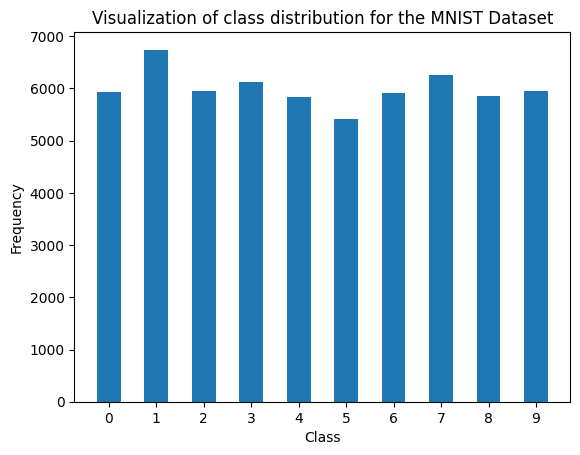

In [4]:
# Rozkładu kategorii, wykres słupkowy  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Visualization of class distribution for the MNIST Dataset')
frequencies=np.array(class_freq)
classes=len(frequencies)
plt.bar(np.arange(classes),frequencies,0.5)
plt.xticks(np.arange(classes))
plt.show()


In [5]:
# Podział danych:  zbiór treningowy i testowy
#from sklearn.model_selection import train_test_split

#train,test = train_test_split (df, test_size=0.3, random_state=50, shuffle = True)

# Tworzyć atrybut docelowy.

X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0] 
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0] 

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


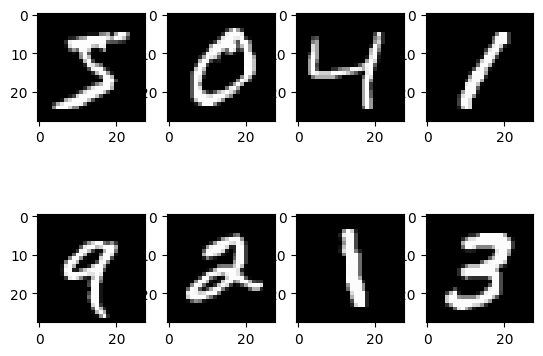

In [6]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(8):
     # define subplot
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_train.iloc[i,:]
    ith_image_arr = ith_image.to_numpy() 
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [7]:
# Klasyfikator DT
# Ewaluacja modelu: accuracy-score, 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
start=time.time()
tree_clf = DecisionTreeClassifier(max_depth=15, criterion='gini')
#gini daje minimalnie lepsze wyniki, zwiekszenie max_depth zwieksza accuracy
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)
end = time.time()
dttime=end-start
print(dttime)
print('Accuracy: ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


13.132221221923828
Accuracy:  0.8824
[[ 926    0    4    5    3   12   11    2    8    9]
 [   3 1091   10    7    1    5    9    4    5    0]
 [  10    5  890   32   12   12    6   29   26   10]
 [   7    6   31  870    5   40    6    9   22   14]
 [   4    3    8   10  870    8   14    6   17   42]
 [  17    7    3   40    6  745   26    9   21   18]
 [  22    5   10    8   19   16  844    2   28    4]
 [   2   12   26   16    7    4    3  932    5   21]
 [  13    7   29   35   24   30   17   10  782   27]
 [  11    4    8   18   39   12    5   16   22  874]]


In [16]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30]
}
grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
start=time.time()
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
end = time.time()
dttime=end-start
print(dttime)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Best parameters: {'criterion': 'entropy', 'max_depth': 20}
134.53378891944885
Accuracy: 0.8877
[[ 916    1    6    3    5   15   11    4   10    9]
 [   1 1101    7    6    0    7    1    2    8    2]
 [   7    3  907   21    7   13   18   21   31    4]
 [   7    7   22  863    4   41    5   15   23   23]
 [  10    5   21   10  863    7   15    4   11   36]
 [  13    3    9   38    7  749   23    2   26   22]
 [  13    4   13    8   23   19  862    4   10    2]
 [   2    8   28   20   12    6    0  927    7   18]
 [   4    8   25   35   19   14   14    7  823   25]
 [   6    6   13   19   37   16    6   18   22  866]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       980
           1       0.96      0.97      0.97      1135
           2       0.86      0.88      0.87      1032
           3       0.84      0.85      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84      

In [15]:
start=time.time()
tree_clf = DecisionTreeClassifier(**grid.best_params_)

tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)
end = time.time()
dttime=end-start
print(dttime)
print('Accuracy: ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

17.210368156433105
Accuracy:  0.8857
[[ 912    2    8    3    3   17   14    5    9    7]
 [   0 1101    7    3    0    8    3    2    9    2]
 [   9    2  910   19   12   14   18   19   27    2]
 [   6    5   26  859    4   43    4   18   27   18]
 [   6    3   17    9  858    5   13   11   16   44]
 [  13    4    8   36    7  754   23    1   26   20]
 [  14    6   12    5   27   18  863    3    7    3]
 [   3   12   30   17   12    5    1  923    8   17]
 [   8    7   20   39   22   20   13    6  814   25]
 [   9    6   14   24   38   17    4   16   18  863]]


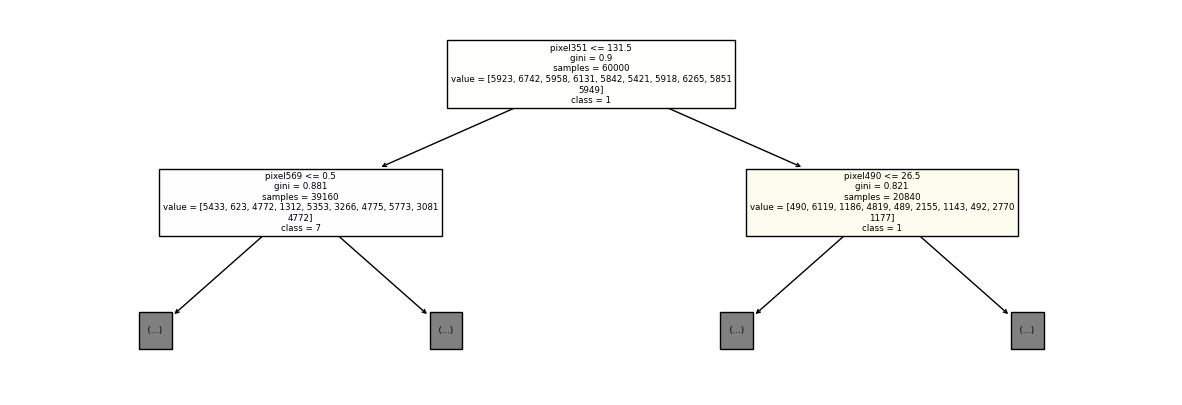

In [53]:
from sklearn import tree 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
f_names = list(df_train.columns.values.tolist())
f_names = f_names[1:]
t_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
tree.plot_tree(tree_clf, max_depth =1, feature_names = f_names, 
                   class_names=t_names, filled = True)
plt.show()

In [54]:
# DT - Text form
from sklearn.tree import export_text
f_names = list(df_train.columns.values.tolist())
f_names = f_names[1:]
r = export_text(tree_clf, feature_names = f_names, max_depth = 3)
print(r)

|--- pixel351 <= 131.50
|   |--- pixel569 <= 0.50
|   |   |--- pixel431 <= 0.50
|   |   |   |--- pixel406 <= 2.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel406 >  2.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- pixel431 >  0.50
|   |   |   |--- pixel212 <= 28.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel212 >  28.50
|   |   |   |   |--- truncated branch of depth 7
|   |--- pixel569 >  0.50
|   |   |--- pixel436 <= 0.50
|   |   |   |--- pixel490 <= 22.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel490 >  22.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- pixel436 >  0.50
|   |   |   |--- pixel347 <= 0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- pixel347 >  0.50
|   |   |   |   |--- truncated branch of depth 7
|--- pixel351 >  131.50
|   |--- pixel490 <= 26.50
|   |   |--- pixel291 <= 34.50
|   |   |   |--- pixel487 <= 58.50
|   |   |   |   |--

In [26]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30]
}
grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
start=time.time()
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
end = time.time()
rftime=end-start
print(rftime)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Best parameters: {'criterion': 'log_loss', 'max_depth': 30, 'n_estimators': 30}
256.4099907875061
Accuracy: 0.9654
[[ 967    0    1    0    0    1    6    1    4    0]
 [   0 1125    2    2    0    2    2    0    1    1]
 [   6    1  998    5    5    0    2    9    6    0]
 [   0    0   11  973    1    6    0    9    7    3]
 [   1    0    2    1  948    0    6    1    2   21]
 [   3    1    1   19    3  850    5    2    6    2]
 [   9    3    2    1    5    4  932    0    2    0]
 [   1    5   22    2    3    0    0  983    3    9]
 [   2    0    6    8    4    5    8    4  929    8]
 [   5    6    5   12   15    8    1    4    4  949]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      

In [13]:
from sklearn.ensemble import RandomForestClassifier
start=time.time()
tree_clf = RandomForestClassifier(**grid.best_params_)

tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)
end = time.time()
dttime=end-start
print(dttime)
print('Accuracy: ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

18.368900299072266
Accuracy:  0.9649
[[ 967    0    2    0    0    3    4    1    3    0]
 [   0 1123    2    3    0    1    3    0    2    1]
 [   7    1  994    5    4    1    4   10    5    1]
 [   0    0   13  961    0   13    0    8   11    4]
 [   1    1    1    0  949    1    5    0    3   21]
 [   4    1    2   15    3  855    5    2    3    2]
 [   6    3    0    0    3    6  935    0    5    0]
 [   2    2   20    3    3    0    0  981    2   15]
 [   4    0    4    8    6    6    5    5  932    4]
 [   8    5    1   13   13    3    2    4    8  952]]


In [27]:
# ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30]
}
grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
start=time.time()
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set

predictions = grid.predict(X_test)
end = time.time()
ettime=end-start
print(ettime)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Best parameters: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 30}
251.36622619628906
Accuracy: 0.9645
[[ 971    0    2    0    0    1    2    1    3    0]
 [   0 1125    0    4    1    1    2    1    1    0]
 [   6    0  995    6    2    0    4   11    7    1]
 [   1    0   11  966    0    9    0    7    9    7]
 [   1    1    1    0  950    0    6    0    3   20]
 [   5    0    0   19    4  847    8    2    5    2]
 [  11    3    0    1    5    4  932    1    1    0]
 [   1    3   20    6    3    0    0  984    2    9]
 [   6    0    4    7    6    8    7    3  924    9]
 [   6    8    3    8   18    5    1    3    6  951]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.9

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
start=time.time()
tree_clf = ExtraTreesClassifier(**grid.best_params_)

tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)
end = time.time()
dttime=end-start
print(dttime)
print('Accuracy: ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

12.10598087310791
Accuracy:  0.9654
[[ 972    0    0    0    0    2    0    1    4    1]
 [   0 1122    2    3    1    1    4    0    1    1]
 [  10    0  991    7    4    1    3    9    6    1]
 [   2    0   11  967    0    8    0    8    8    6]
 [   1    0    0    0  950    0    5    1    4   21]
 [   6    0    0   17    1  855    5    1    6    1]
 [   8    3    2    0    4    3  938    0    0    0]
 [   1    4   19    5    4    0    0  980    2   13]
 [   6    0    7    8    5    8    2    5  921   12]
 [   3    5    2   11   11    6    1    5    7  958]]


In [43]:
#Klasyfikator XGBoost
#!pip install  xgboost
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
grid = xgb.XGBClassifier(max_depth=10)

start=time.time()
grid.fit(X_train, y_train)


# Evaluate on the test set
predictions = grid.predict(X_test)
end = time.time()
xgbtime=end-start
print(xgbtime)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

178.3105447292328
Accuracy: 0.9756
[[ 970    0    0    0    0    2    3    1    3    1]
 [   1 1124    3    2    0    1    2    1    1    0]
 [   4    0 1003    7    3    0    1    7    6    1]
 [   2    0    4  987    1    2    0    8    5    1]
 [   1    0    3    1  955    0    3    0    4   15]
 [   2    0    0    8    1  867    6    3    3    2]
 [   5    3    0    0    2    5  939    0    4    0]
 [   1    3   15    3    1    0    0  994    3    8]
 [   2    1    4    3    2    3    5    2  947    5]
 [   6    5    3    5    8    2    0    5    5  970]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
 